In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from analysis_functions import *
from model_functions import *
import matplotlib.patches as patches
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, chi2, mannwhitneyu, ttest_ind

# Read extraced variables into csv

Consider importing multiple datasets

In [2]:
closedopenMM_GCaMPvars = pd.read_csv('Saved_data/GCaMP_closedopenMM_all_470_stats_df.csv')
#closedopenMM_GCaMPvars = pd.read_csv('GRAB_MM_extracted_closedopenMM_GCaMPvars.csv')
#sensor = 'GRAB'
closedopenMM_GCaMPvars

,session,block_type,mouse_id,event_time,movementX_prior,movementY_prior,time_range,valid_data,peak,mean,median,stderr,halt
0,session 1,closedloop,B3M3,95.818,14.744543,2.121528,-1-0s,True,1.475076,-0.001464,0.158885,0.023800,True
1,session 1,closedloop,B3M3,95.818,14.744543,2.121528,0-1s,True,5.315242,1.509365,1.309904,0.086313,True
2,session 1,closedloop,B3M3,95.818,14.744543,2.121528,1-2s,True,5.275810,3.832685,3.898209,0.021136,True
3,session 1,closedloop,B3M3,118.352,15.799878,2.204030,-1-0s,True,3.709250,-0.000857,0.109697,0.062860,True
4,session 1,closedloop,B3M3,118.352,15.799878,2.204030,0-1s,True,1.542921,0.064895,0.139069,0.021871,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,session 2,openloop,B3M3,1812.040,-0.093984,0.317783,0-1s,True,1.251757,-0.166572,-0.354865,0.022298,False
506,session 2,openloop,B3M3,1812.040,-0.093984,0.317783,1-2s,True,10.747248,2.588257,-0.264668,0.137419,False
507,session 2,openloop,B3M3,1857.821,21.159917,2.824267,-1-0s,True,2.292401,-0.001689,0.137534,0.048282,False
508,session 2,openloop,B3M3,1857.821,21.159917,2.824267,0-1s,True,-0.100854,-1.517470,-1.656679,0.020027,False


# Make boxplots to view difference in params for halts and no-halts 

In [3]:
#Look at halt data for 0 to 1 second after halt
halt_data_during_session1 = filter_data(closedopenMM_GCaMPvars, ['was_halt', 'session 1', '0-1s'])
halt_data_during_session1.describe() 

,event_time,movementX_prior,movementY_prior,peak,mean,median,stderr
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,684.725280,15.469190,1.981770,3.102748,1.083245,1.142435,0.038174
std,508.694781,6.551652,0.961047,2.274812,2.032291,2.102087,0.017052
min,95.818000,-0.362377,-0.482220,-1.493026,-3.136345,-3.511195,0.017985
25%,317.933000,13.891035,1.843951,1.688077,0.064895,0.139069,0.023188
50%,614.847000,16.757349,2.258609,3.084253,1.509365,1.612630,0.035822
75%,841.444000,19.652427,2.564559,4.306646,1.937671,2.295876,0.047601
max,1866.951000,23.847944,3.145091,8.007807,5.627188,5.215740,0.086313


In [4]:
#Look at halt data for 0 to 1 second after the non-halt
Nohalt_during_session1 = filter_data(closedopenMM_GCaMPvars, ['no_halt', 'session 1', '0-1s'])
Nohalt_during_session1.describe() 

,event_time,movementX_prior,movementY_prior,peak,mean,median,stderr
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,867.387000,13.619280,1.890190,1.526633,-0.256153,-0.332926,0.025160
std,508.606978,7.424998,1.012590,2.293823,1.764918,1.728479,0.015765
min,38.365000,-0.196126,-0.179721,-2.939829,-4.114176,-4.269046,0.011213
25%,505.836750,10.252260,1.461040,0.346642,-1.172444,-1.263271,0.015442
50%,779.403000,15.724227,2.147791,1.015211,-0.459359,-0.479851,0.021153
75%,1296.657500,18.573750,2.616737,1.902302,0.328454,0.241921,0.026354
max,1857.821000,29.322797,3.670428,9.697614,5.575705,4.933945,0.081313


## Plotting params for individual mice

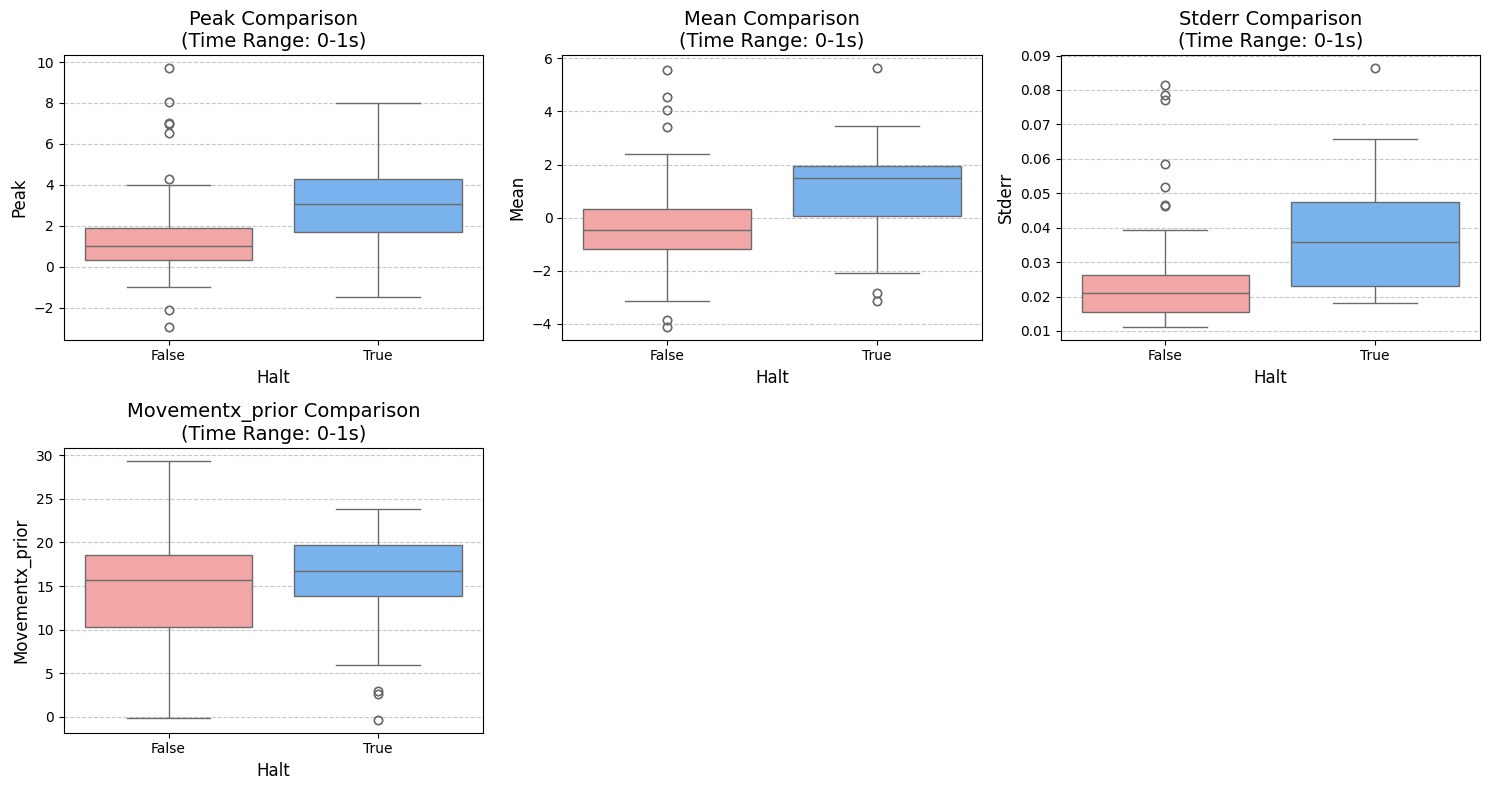

(<Figure size 1500x800 with 4 Axes>,
 array([<Axes: title={'center': 'Peak Comparison\n(Time Range: 0-1s)'}, xlabel='Halt', ylabel='Peak'>,
        <Axes: title={'center': 'Mean Comparison\n(Time Range: 0-1s)'}, xlabel='Halt', ylabel='Mean'>,
        <Axes: title={'center': 'Stderr Comparison\n(Time Range: 0-1s)'}, xlabel='Halt', ylabel='Stderr'>,
        <Axes: title={'center': 'Movementx_prior Comparison\n(Time Range: 0-1s)'}, xlabel='Halt', ylabel='Movementx_prior'>,
        <Axes: >, <Axes: >], dtype=object))

In [5]:
# List of statistics to compare
statistics_to_compare = ['peak', 'mean', 'stderr', 'movementX_prior']

# Generate the grid of boxplots for the time range '0-1s'
compare_statistics_grid(closedopenMM_GCaMPvars, statistics=statistics_to_compare, time_range='0-1s')



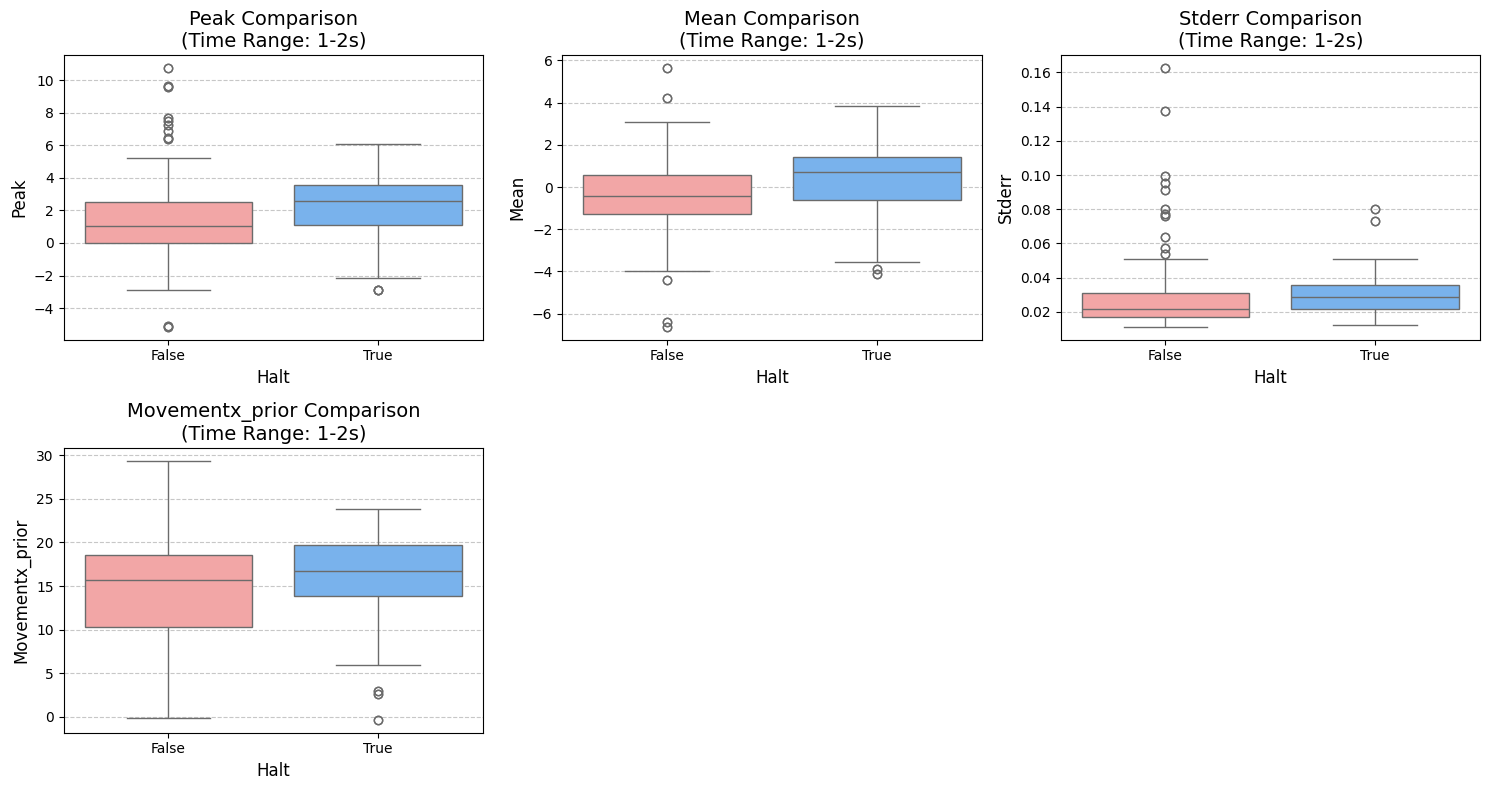

(<Figure size 1500x800 with 4 Axes>,
 array([<Axes: title={'center': 'Peak Comparison\n(Time Range: 1-2s)'}, xlabel='Halt', ylabel='Peak'>,
        <Axes: title={'center': 'Mean Comparison\n(Time Range: 1-2s)'}, xlabel='Halt', ylabel='Mean'>,
        <Axes: title={'center': 'Stderr Comparison\n(Time Range: 1-2s)'}, xlabel='Halt', ylabel='Stderr'>,
        <Axes: title={'center': 'Movementx_prior Comparison\n(Time Range: 1-2s)'}, xlabel='Halt', ylabel='Movementx_prior'>,
        <Axes: >, <Axes: >], dtype=object))

In [6]:
# List of statistics to compare
statistics_to_compare = ['peak', 'mean', 'stderr', 'movementX_prior']

# Generate the grid of boxplots for the time range '0-1s'
compare_statistics_grid(closedopenMM_GCaMPvars, statistics=statistics_to_compare, time_range='1-2s')

In [7]:
# Grouping by relevant columns and aggregating the desired statistics
mouse_means = (
    closedopenMM_GCaMPvars.groupby(['mouse_id', 'halt', 'block_type', 'session', 'time_range'])
    .agg({
        'peak': 'mean',  # Mean peak response for each group
        'mean': 'mean',  # Mean response for each group
        'stderr': 'mean',  # Mean standard error for each group
        'movementX_prior': 'mean',  # Mean movementX_prior
        'movementY_prior': 'mean',  # Mean movementY_prior
    })
    .reset_index()  # Reset index for easier handling
)

# Displaying the result
mouse_means


,mouse_id,halt,block_type,session,time_range,peak,mean,stderr,movementX_prior,movementY_prior
0,B3M3,False,closedloop,session 1,-1-0s,2.083627,0.000145,0.033694,13.803164,2.007094
1,B3M3,False,closedloop,session 1,0-1s,1.781550,0.008148,0.024983,13.803164,2.007094
2,B3M3,False,closedloop,session 1,1-2s,1.744627,-0.330842,0.031608,13.803164,2.007094
3,B3M3,False,closedloop,session 2,-1-0s,2.083627,0.000145,0.033694,13.803164,2.007094
4,B3M3,False,closedloop,session 2,0-1s,1.781550,0.008148,0.024983,13.803164,2.007094
5,B3M3,False,closedloop,session 2,1-2s,1.744627,-0.330842,0.031608,13.803164,2.007094
6,B3M3,False,openloop,session 1,-1-0s,1.998361,-0.000651,0.029245,13.251511,1.656383
7,B3M3,False,openloop,session 1,0-1s,1.016799,-0.784756,0.025515,13.251511,1.656383
8,B3M3,False,openloop,session 1,1-2s,1.668208,-0.734361,0.038511,13.251511,1.656383
9,B3M3,False,openloop,session 2,-1-0s,1.998361,-0.000651,0.029245,13.251511,1.656383


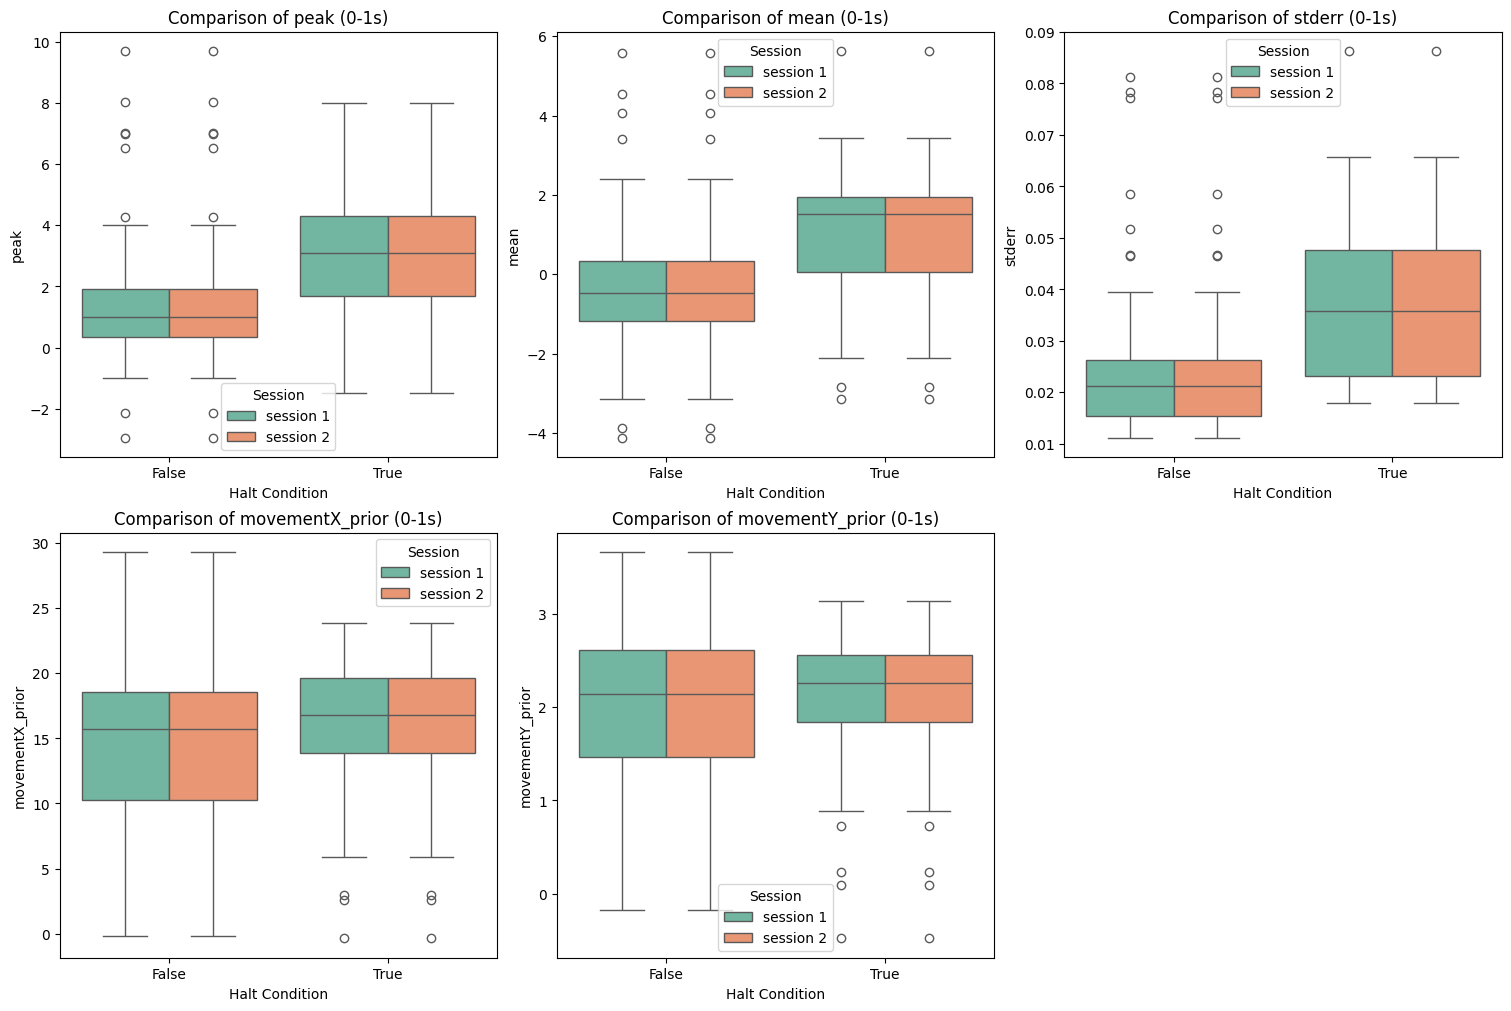

(<Figure size 1500x1000 with 5 Axes>,
 array([<Axes: title={'center': 'Comparison of peak (0-1s)'}, xlabel='Halt Condition', ylabel='peak'>,
        <Axes: title={'center': 'Comparison of mean (0-1s)'}, xlabel='Halt Condition', ylabel='mean'>,
        <Axes: title={'center': 'Comparison of stderr (0-1s)'}, xlabel='Halt Condition', ylabel='stderr'>,
        <Axes: title={'center': 'Comparison of movementX_prior (0-1s)'}, xlabel='Halt Condition', ylabel='movementX_prior'>,
        <Axes: title={'center': 'Comparison of movementY_prior (0-1s)'}, xlabel='Halt Condition', ylabel='movementY_prior'>,
        <Axes: >], dtype=object))

In [8]:
# List of statistics to compare
statistics_to_compare = ['peak', 'mean', 'stderr', 'movementX_prior', 'movementY_prior']

# Generate the grid of boxplots for the time range '0-1s'
compare_statistics_grid_sessions(closedopenMM_GCaMPvars, statistics=statistics_to_compare, time_range='0-1s')


## Plotting all mouse averages togheter

In [9]:
mouse_means.loc[mouse_means.time_range == '0-1s']

,mouse_id,halt,block_type,session,time_range,peak,mean,stderr,movementX_prior,movementY_prior
1,B3M3,False,closedloop,session 1,0-1s,1.781550,0.008148,0.024983,13.803164,2.007094
4,B3M3,False,closedloop,session 2,0-1s,1.781550,0.008148,0.024983,13.803164,2.007094
7,B3M3,False,openloop,session 1,0-1s,1.016799,-0.784756,0.025515,13.251511,1.656383
10,B3M3,False,openloop,session 2,0-1s,1.016799,-0.784756,0.025515,13.251511,1.656383
13,B3M3,True,closedloop,session 1,0-1s,3.032992,1.304359,0.035341,16.422109,2.156270
16,B3M3,True,closedloop,session 2,0-1s,3.032992,1.304359,0.035341,16.422109,2.156270
19,B3M3,True,openloop,session 1,0-1s,3.323641,0.383049,0.047146,12.451612,1.429184
22,B3M3,True,openloop,session 2,0-1s,3.323641,0.383049,0.047146,12.451612,1.429184


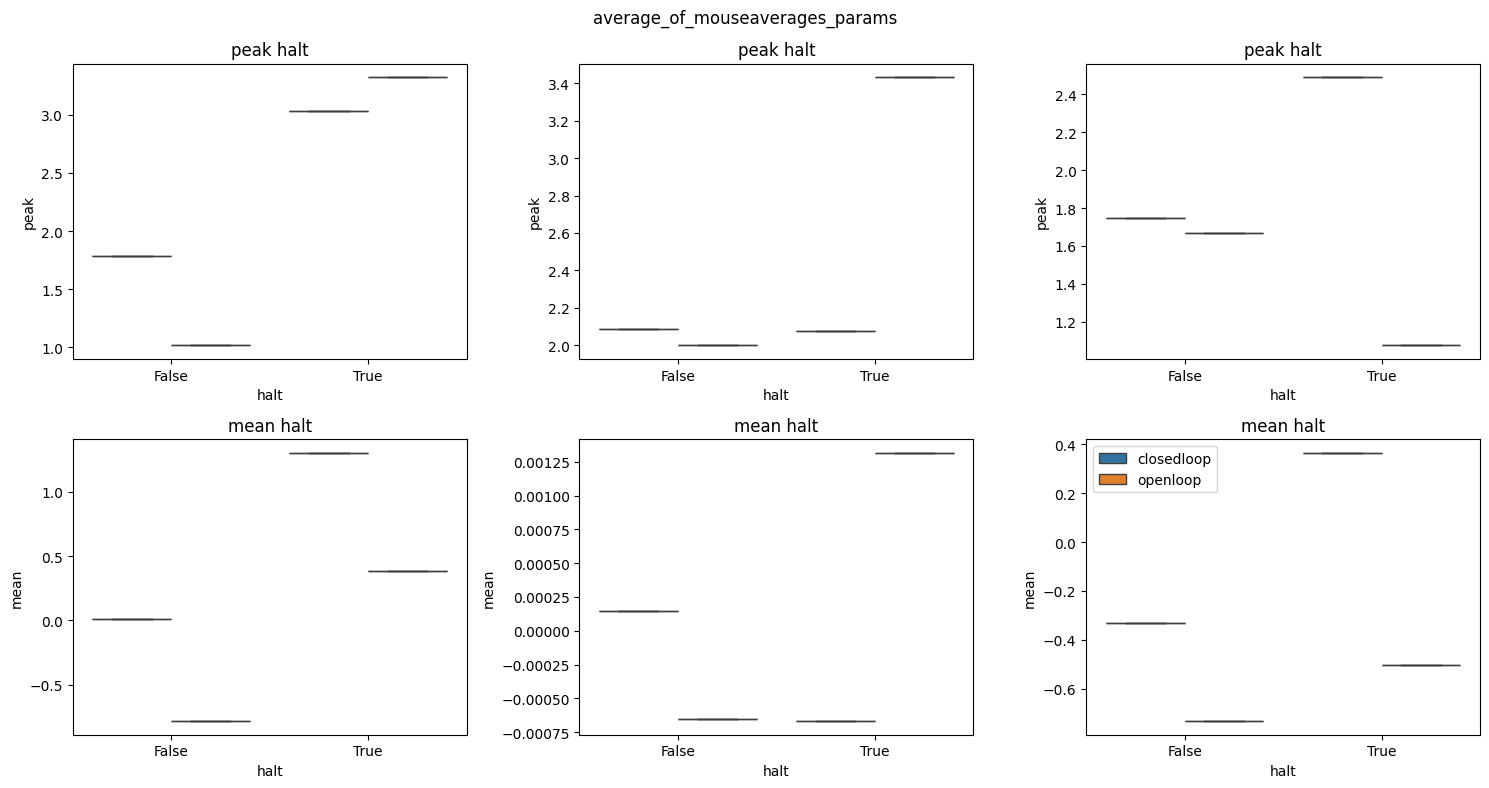

In [10]:
fig, ax = plt.subplots(2,3, figsize = (15, 8))
ax = ax.flatten()

i = 0

response_params = ['peak', 'mean']
for response_col in response_params:
        
    sns.boxplot(x="halt", y=response_col, data=mouse_means.loc[mouse_means.time_range == '0-1s'], hue="block_type", ax=ax[i])
    ax[i].set_title(f"{response_col} halt")
    ax[i].get_legend().remove()
    
    i+=1

    sns.boxplot(x="halt", y=response_col, data=mouse_means.loc[mouse_means.time_range == '-1-0s'], hue="block_type", ax=ax[i])
    ax[i].set_title(f"{response_col} halt")
    ax[i].get_legend().remove()

    i+=1

    sns.boxplot(x="halt", y=response_col, data=mouse_means.loc[mouse_means.time_range == '1-2s'], hue="block_type", ax=ax[i])
    ax[i].set_title(f"{response_col} halt")
    ax[i].get_legend().remove()

    i+=1
plt.legend()
fig.suptitle(f'average_of_mouseaverages_params')

fig.tight_layout(pad=1.08)
#fig.savefig(f'Figures/_halt_nohalt_boxplot.png', format = 'png')


In [11]:
## Testing the response difference in the halt and control condition

In [12]:
def testing_diff_control(main_df, control_df):
    #testing normality
    shapiro_main = shapiro(main_df)
    shapiro_control= shapiro(control_df)

    print("Shapiro-Wilk test for halt:", shapiro_main)
    print("Shapiro-Wilk test for no halt:", shapiro_control)

    if (shapiro_main.pvalue < 0.05) or (shapiro_control.pvalue < 0.05):
        print('\n Datasets are normally distributed, will perform t-test \n')
        t_stat, p_val = ttest_ind(main_df, control_df, equal_var=False)
        print(f"T-test: t-statistic={t_stat}, p-value={p_val}")
    else:
        print('\n At least one dataset is not normally distributed, will perform Mann–Whitney U test \n')
        u_stat, p_val = mannwhitneyu(main_df, control_df, alternative='two-sided')
        print(f"Mann-Whitney U test: U-statistic={u_stat}, p-value={p_val}")

    mean_diff = np.mean(main_df) - np.mean(control_df)
    pooled_std = np.sqrt((np.std(main_df, ddof=1)**2 + np.std(control_df, ddof=1)**2) / 2)
    cohens_d = mean_diff / pooled_std
    print(f"Cohen's d: {cohens_d}")

In [13]:
halt_mean_response = mouse_means.loc[mouse_means['halt'] == True, 'mean']
no_halt_mean_response = mouse_means.loc[mouse_means['halt'] == False, 'mean']

testing_diff_control(halt_mean_response, no_halt_mean_response)

Shapiro-Wilk test for halt: ShapiroResult(statistic=np.float64(0.8700258724324486), pvalue=np.float64(0.0653989859749094))
Shapiro-Wilk test for no halt: ShapiroResult(statistic=np.float64(0.7548773917401947), pvalue=np.float64(0.0030062318538019535))

 Datasets are normally distributed, will perform t-test 

T-test: t-statistic=2.8835342804595316, p-value=0.009768347682332479
Cohen's d: 1.177197940491549


In [14]:
halt_peak_response = mouse_means.loc[mouse_means['halt'] == True, 'peak']
no_peak_mean_response = mouse_means.loc[mouse_means['halt'] == False, 'peak']

testing_diff_control(halt_peak_response, no_peak_mean_response)

Shapiro-Wilk test for halt: ShapiroResult(statistic=np.float64(0.8635275724427853), pvalue=np.float64(0.05413456468901514))
Shapiro-Wilk test for no halt: ShapiroResult(statistic=np.float64(0.8098311228520337), pvalue=np.float64(0.01214547297075048))

 Datasets are normally distributed, will perform t-test 

T-test: t-statistic=3.200629107097994, p-value=0.006051244492148043
Cohen's d: 1.3066513613816364


## Fitting Linear Mixed-Effects Model
Response = β0 +β1 ⋅moveX+β2 ⋅moveY+β3 ⋅event+β4 ⋅block_type+β5 ⋅ moveX:block_type+u mouse_id + ϵ

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit Linear Mixed-Effects Model
model = smf.mixedlm(
    "mean ~ movementX_prior + halt + block_type + movementX_prior:block_type",
    data=closedopenMM_GCaMPvars,
    groups=closedopenMM_GCaMPvars["mouse_id"]
)
result = model.fit()
print(result.summary())


                        Mixed Linear Model Regression Results
Model:                       MixedLM           Dependent Variable:           mean     
No. Observations:            510               Method:                       REML     
No. Groups:                  1                 Scale:                        2.6266   
Min. group size:             510               Log-Likelihood:               -977.6373
Max. group size:             510               Converged:                    Yes      
Mean group size:             510.0                                                    
--------------------------------------------------------------------------------------
                                       Coef.     Std.Err.     z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------
Intercept                               0.020         1.637  0.012 0.990 -3.189  3.229
halt[T.True]                            0.615         0.161  3.827 0

In [16]:
print(closedopenMM_GCaMPvars["mouse_id"].value_counts())
print(closedopenMM_GCaMPvars.groupby("mouse_id")[["movementX_prior", "movementY_prior"]].std())


mouse_id
B3M3    510
Name: count, dtype: int64
          movementX_prior  movementY_prior
mouse_id                                  
B3M3              7.15526            0.988


In [17]:
# Fit Linear Mixed-Effects Model
model = smf.mixedlm(
    "peak ~ movementX_prior + halt + block_type + movementX_prior:block_type",
    data=closedopenMM_GCaMPvars,
    groups=closedopenMM_GCaMPvars["mouse_id"]
)
result = model.fit()
print(result.summary())

                        Mixed Linear Model Regression Results
Model:                      MixedLM           Dependent Variable:           peak      
No. Observations:           510               Method:                       REML      
No. Groups:                 1                 Scale:                        5.2864    
Min. group size:            510               Log-Likelihood:               -1154.2424
Max. group size:            510               Converged:                    Yes       
Mean group size:            510.0                                                     
--------------------------------------------------------------------------------------
                                       Coef.     Std.Err.     z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------
Intercept                               2.988         2.323  1.286 0.198 -1.565  7.541
halt[T.True]                            0.905         0.228  3.968 0

In [18]:
# Fit Linear Mixed-Effects Model
model = smf.mixedlm(
    "mean ~ halt",
    data=closedopenMM_GCaMPvars,
    groups=closedopenMM_GCaMPvars["mouse_id"]
)
result = model.fit()
print(result.summary())

           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  mean     
No. Observations:    510      Method:              REML     
No. Groups:          1        Scale:               2.7295   
Min. group size:     510      Log-Likelihood:      -981.3178
Max. group size:     510      Converged:           Yes      
Mean group size:     510.0                                  
------------------------------------------------------------
             Coef.     Std.Err.     z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept    -0.241         1.654 -0.145 0.884 -3.483  3.002
halt[T.True]  0.654         0.161  4.072 0.000  0.339  0.968
Group Var     2.730 221744876.957                           



## Look at halt data alone - especially if significantly different from no halt data

In [19]:
halt_data = filter_data(closedopenMM_GCaMPvars, ['was_halt'])

In [20]:
# Fit Linear Mixed-Effects Model
model = smf.mixedlm(
    "peak ~ movementX_prior + block_type + movementX_prior:block_type",
    data=halt_data,
    groups=halt_data["mouse_id"]
)
result = model.fit()
print(result.summary())

                      Mixed Linear Model Regression Results
Model:                      MixedLM         Dependent Variable:         peak     
No. Observations:           150             Method:                     REML     
No. Groups:                 1               Scale:                      4.1380   
Min. group size:            150             Log-Likelihood:             -322.9353
Max. group size:            150             Converged:                  Yes      
Mean group size:            150.0                                                
---------------------------------------------------------------------------------
                                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------
Intercept                               2.791    2.164  1.289 0.197 -1.451  7.033
block_type[T.openloop]                  1.732    0.917  1.888 0.059 -0.066  3.530
movementX_prior                       

/Users/hildeteigen/opt/anaconda3/envs/aeon_env_3/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [21]:
#Fit a variable at a time
response_running = smf.ols('mean ~ movementX_prior + movementX_prior:block_type', data=halt_data).fit()

print(response_running.summary())
#print(response_running.t_test('PeakResponse'))
print("MSE=%.3f" % response_running.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     7.352
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           0.000906
Time:                        10:01:26   Log-Likelihood:                -287.13
No. Observations:                 150   AIC:                             580.3
Df Residuals:                     147   BIC:                             589.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [25]:
closedloop_data = filter_data(halt_data, ['closedloop', '0-1s'])

cloop_response_running = smf.ols('mean ~ movementX_prior', data=closedloop_data).fit()

print(cloop_response_running.summary())
#print(response_running.t_test('PeakResponse'))
print("MSE=%.3f" % response_running.mse_resid)

openloop_data = filter_data(halt_data, ['openloop', '0-1s'])

oloop_response_running = smf.ols('mean ~ movementX_prior', data=openloop_data).fit()

print(oloop_response_running.summary())
#print(response_running.t_test('PeakResponse'))
print("MSE=%.3f" % response_running.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.1409
Date:                Mon, 27 Jan 2025   Prob (F-statistic):              0.710
Time:                        10:04:27   Log-Likelihood:                -66.590
No. Observations:                  38   AIC:                             137.2
Df Residuals:                      36   BIC:                             140.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9770      0.903     

/Users/hildeteigen/opt/anaconda3/envs/aeon_env_3/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [28]:
cloop_response_time = smf.ols('mean ~ event_time', data=closedloop_data).fit()

print(cloop_response_time.summary())


oloop_response_time = smf.ols('mean ~ event_time', data=openloop_data).fit()

print(oloop_response_time.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9842
Date:                Mon, 27 Jan 2025   Prob (F-statistic):              0.328
Time:                        10:06:32   Log-Likelihood:                -66.152
No. Observations:                  38   AIC:                             136.3
Df Residuals:                      36   BIC:                             139.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9179      0.452      2.029      0.0

/Users/hildeteigen/opt/anaconda3/envs/aeon_env_3/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


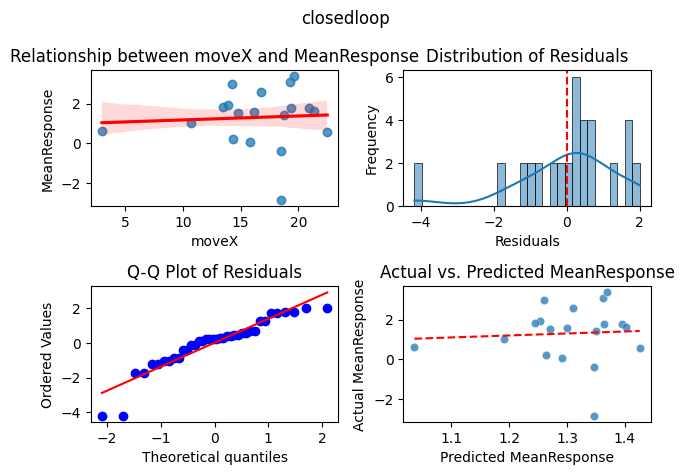

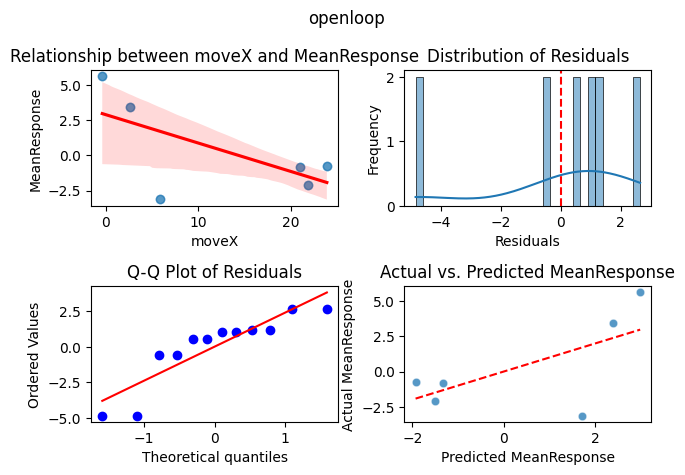

In [34]:
#plotting closed loop
block_result_dict = {'closedloop': [cloop_response_running, closedloop_data],'openloop': [oloop_response_running, openloop_data]}

for block, resultlist in block_result_dict.items():
    
    fig, ax =  plt.subplots(2,2)
    ax = ax.flatten()
    
    residuals = resultlist[0].resid
    sns.regplot(
        x="movementX_prior",
        y="mean",
        data=resultlist[1],
        line_kws={"color": "red"},
        scatter_kws={"alpha": 0.5}, ax= ax[0])
    ax[0].set_title("Relationship between moveX and mean")
    ax[0].set_xlabel("moveX")
    ax[0].set_ylabel("mean")
    
    sns.histplot(residuals, kde=True, bins=30, ax = ax[1])
    ax[1].set_title("Distribution of Residuals")
    ax[1].set_xlabel("Residuals")
    ax[1].set_ylabel("Frequency")
    ax[1].axvline(0, color='red', linestyle='--')
    
    # Q-Q plot
    
    stats.probplot(residuals, dist="norm", plot= ax[2])
    ax[2].set_title("Q-Q Plot of Residuals")
    
    predicted = resultlist[0].params.Intercept + (resultlist[0].params.movementX_prior * resultlist[1]["movementX_prior"])
    
    # Actual vs. predicted plot
    sns.scatterplot(x=predicted, y=resultlist[1]["mean"], alpha=0.5, ax = ax[3])
    ax[3].plot([min(predicted), max(predicted)], [min(predicted), max(predicted)], color="red", linestyle="--")
    ax[3].set_title("Actual vs. Predicted mean")
    ax[3].set_xlabel("Predicted mean")
    ax[3].set_ylabel("Actual mean")
    
    fig.suptitle(block)
    
    fig.tight_layout()
    


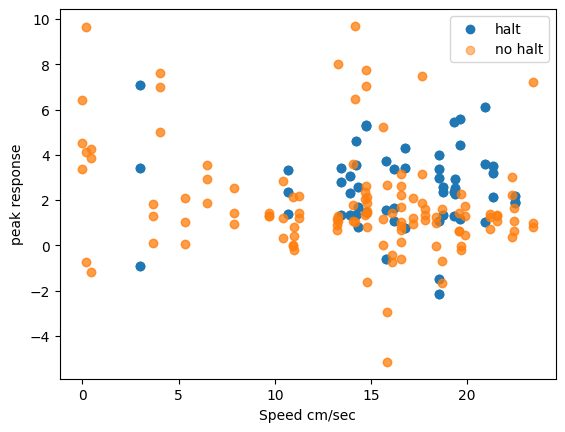

In [40]:
halt_closedloop_data = filter_data(closedopenMM_GCaMPvars, ['was_halt', 'closedloop'])##closedopenMM_GCaMPvars[(closedopenMM_GCaMPvars['halt'] == True) & (closedopenMM_GCaMPvars['block_type'] == 'closedloop')]

plt.scatter(halt_closedloop_data['movementX_prior'], halt_closedloop_data['peak'], label = 'halt')

nohalt_closedloop_data = filter_data(closedopenMM_GCaMPvars, ['no_halt', 'closedloop'])#[(closedopenMM_GCaMPvars['halt'] == False) & (closedopenMM_GCaMPvars['block_type'] == 'closedloop')]

plt.scatter(nohalt_closedloop_data['movementX_prior'], nohalt_closedloop_data['peak'], alpha = 0.5, label = 'no halt')

plt.xlabel('Speed cm/sec')
plt.ylabel('peak response')
plt.legend()

In [42]:
# Fit a mixed-effects model
mixed_model = smf.mixedlm(
    "peak ~ halt + session + block_type",  # Fixed effects
    data=closedopenMM_GCaMPvars,
    groups=closedopenMM_GCaMPvars['mouse_id'],  # Random intercept for mouse_id
).fit()

print(mixed_model.summary())


                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     peak      
No. Observations:       510         Method:                 REML      
No. Groups:             1           Scale:                  5.6206    
Min. group size:        510         Log-Likelihood:         -1164.9805
Max. group size:        510         Converged:              Yes       
Mean group size:        510.0                                         
----------------------------------------------------------------------
                       Coef.     Std.Err.     z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept               1.837         2.378  0.773 0.440 -2.823  6.497
halt[T.True]            0.766         0.231  3.309 0.001  0.312  1.219
session[T.session 2]   -0.000         0.210 -0.000 1.000 -0.412  0.412
block_type[T.openloop] -0.211         0.229 -0.921 0.357 -0.659  0.238
Group Var              

In [44]:
# Random slopes for 'event' by 'mouse_id'
random_slopes_model = smf.mixedlm(
    "peak ~ halt +session + block_type",
    data=closedopenMM_GCaMPvars,
    groups=closedopenMM_GCaMPvars["mouse_id"],
    re_formula="~halt"  # Random slope for event within mouse_id
).fit()

print(random_slopes_model.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    peak      
No. Observations:      510        Method:                REML      
No. Groups:            1          Scale:                 5.6206    
Min. group size:       510        Log-Likelihood:        -1164.9805
Max. group size:       510        Converged:             Yes       
Mean group size:       510.0                                       
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 1.837    2.378  0.773 0.440 -2.823  6.497
halt[T.True]              0.766    2.382  0.321 0.748 -3.903  5.434
session[T.session 2]      0.000    0.210  0.000 1.000 -0.412  0.412
block_type[T.openloop]   -0.211    0.229 -0.921 0.357 -0.659  0.238
Group Var                 5.621                                

/Users/hildeteigen/opt/anaconda3/envs/aeon_env_3/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [45]:
null_model = smf.mixedlm(
    "peak ~ session + block_type",
    data=closedopenMM_GCaMPvars,
    groups=closedopenMM_GCaMPvars["mouse_id"]
).fit()
print(null_model.summary())

                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     peak      
No. Observations:       510         Method:                 REML      
No. Groups:             1           Scale:                  5.7308    
Min. group size:        510         Log-Likelihood:         -1169.8616
Max. group size:        510         Converged:              Yes       
Mean group size:        510.0                                         
----------------------------------------------------------------------
                       Coef.     Std.Err.     z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept               2.084         2.400  0.868 0.385 -2.619  6.787
session[T.session 2]   -0.000         0.212 -0.000 1.000 -0.416  0.416
block_type[T.openloop] -0.280         0.230 -1.219 0.223 -0.731  0.170
Group Var               5.731 227197774.696                           



In [46]:
# Calculate likelihood ratio
ll_null = null_model.llf  # Log-likelihood of the null model
ll_full = mixed_model.llf  # Log-likelihood of the full model
lr_stat = -2 * (ll_null - ll_full)

# Degrees of freedom
df_diff = mixed_model.df_modelwc - null_model.df_modelwc

# p-value
p_value = chi2.sf(lr_stat, df_diff)

print(f"Likelihood Ratio Test Statistic: {lr_stat}")
print(f"Degrees of Freedom: {df_diff}")
print(f"P-Value: {p_value}")

Likelihood Ratio Test Statistic: 9.762050204551088
Degrees of Freedom: 1
P-Value: 0.0017815112720050612


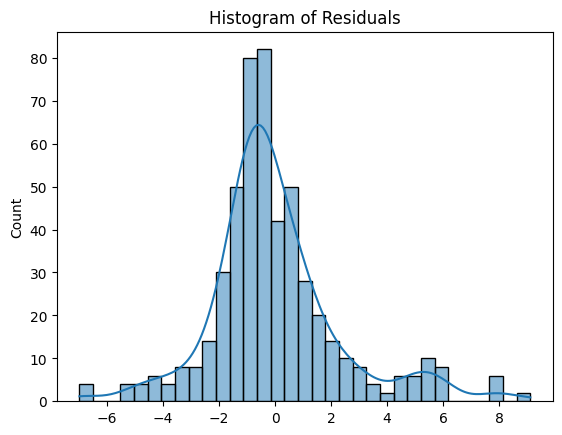

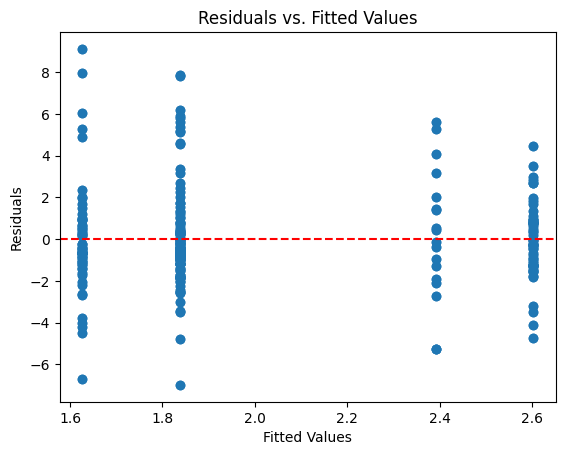

In [47]:
# Extract residuals
residuals = mixed_model.resid

# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# Residuals vs. fitted values
fitted_values = mixed_model.fittedvalues
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [49]:
# Function to resample and refit the model
import warnings
#from sklearn.exceptions import ConvergenceWarning

def bootstrap_coefficients(model, data, n_bootstraps=1000):
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    bootstrap_results = []
    for _ in range(n_bootstraps):
        sample = data.sample(frac=1, replace=True)  # Resample with replacement
        bootstrap_model = smf.mixedlm(
            formula=model.model.formula,
            data=sample,
            groups=sample["mouse_id"],
            re_formula="~halt"
        ).fit(method='lbfgs', maxiter=100)
        bootstrap_results.append(bootstrap_model.params)
    return pd.DataFrame(bootstrap_results)

# Apply bootstrapping
#bootstrap_results = bootstrap_coefficients(mixed_model, combined_closedopenMM_GCaMPvars)
#print(bootstrap_results.describe())

In [50]:

#closedopenMM_GCaMPvars.describe()
#bootstrap_results.describe()

In [54]:
interaction_model = smf.mixedlm(
    "peak ~ halt * block_type + session",
    data=closedopenMM_GCaMPvars,
    groups=closedopenMM_GCaMPvars["mouse_id"],
    re_formula="~halt"
).fit()

print(interaction_model.summary())

                    Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        peak      
No. Observations:         510            Method:                    REML      
No. Groups:               1              Scale:                     5.6257    
Min. group size:          510            Log-Likelihood:            -1164.4365
Max. group size:          510            Converged:                 Yes       
Mean group size:          510.0                                               
------------------------------------------------------------------------------
                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------
Intercept                            1.870    2.379  0.786 0.432 -2.793  6.533
halt[T.True]                         0.664    2.387  0.278 0.781 -4.015  5.343
block_type[T.openloop]              -0.309    0.265 -1.165 0.244 -0.829  

/Users/hildeteigen/opt/anaconda3/envs/aeon_env_3/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [56]:
nohalt_model = smf.mixedlm(
    "mean ~ block_type + session",
    data=Nohalt_during_session1 ,
    groups=Nohalt_during_session1["mouse_id"]
).fit()

print(nohalt_model.summary())

              Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    mean     
No. Observations:     60         Method:                REML     
No. Groups:           1          Scale:                 3.0241   
Min. group size:      60         Log-Likelihood:        -117.7327
Max. group size:      60         Converged:             Yes      
Mean group size:      60.0                                       
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.008    1.761  0.005 0.996 -3.443  3.459
block_type[T.openloop] -0.793    0.476 -1.665 0.096 -1.726  0.141
Group Var               3.024                                    



/Users/hildeteigen/opt/anaconda3/envs/aeon_env_3/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [57]:
halt_model = smf.mixedlm(
    "mean ~ block_type + session",
    data=halt_data_during_session1,
    groups=halt_data_during_session1["mouse_id"]
).fit()

print(halt_model.summary())

              Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    mean    
No. Observations:      25         Method:                REML    
No. Groups:            1          Scale:                 4.1415  
Min. group size:       25         Log-Likelihood:        -51.3458
Max. group size:       25         Converged:             Yes     
Mean group size:       25.0                                      
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               1.304    2.088  0.625 0.532 -2.788  5.397
block_type[T.openloop] -0.921    0.953 -0.967 0.334 -2.789  0.947
Group Var               4.141                                    



/Users/hildeteigen/opt/anaconda3/envs/aeon_env_3/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
